# Grid parameters
In this notebook you can investigate at the grid parameters of a classification version.

In [1]:
import warnings
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../../..")) # Determine the project's root directory
sys.path.append(PROJECT_ROOT) # Add the project root directory to Python's module search path.

from classification.database_communication.DatabaseCommunication import DatabaseCommunication
from plotting.plot_networks import *
from classification.clustering.config_clustering import *

warnings.filterwarnings('ignore')

dc = DatabaseCommunication()
df_parameters_of_grids = dc.municipal_register_with_clustering_parameters_for_classification_version()

Database connection is constructed. 


Make a subselection of the parameters to plot

In [2]:
df_pairplot = df_parameters_of_grids.drop(
    ['version_id', 'plz', 'bcid', 'kcid', 'ratio', 'house_distance_km', 'no_connection_buses', 'resistance',
     'reactance', 'osm_trafo',
     'simultaneous_peak_load_mw',
     'no_household_equ',
     'max_power_mw', 'pop', 'area', 'lat', 'lon', 'ags', 'name_city', 'regio7', 'regio5', 'pop_den', 'filtered'], axis=1)
df_pairplot.head()

no_branches  no_house_connections  no_house_connections_per_branch  \
0            1                     3                         3.000000   
1            2                     5                         2.500000   
2            2                     3                         1.500000   
3            3                    16                         5.333333   
4            1                     1                         1.000000   

   no_households  no_households_per_branch  max_no_of_households_of_a_branch  \
0              8                  7.134196                          7.134196   
1              5                  2.500000                          3.000000   
2              5                  2.500000                          3.000000   
3             39                 12.994264                         24.149180   
4              1                  0.062694                          0.062694   

   transformer_mva  max_trafo_dis  avg_trafo_dis  cable_length_km  \
0              0.1       0.117931       0.107976         0.314962   
1              0.1       0.088689       0.061664         0.305972   
2              0.1       0.108193       0.079682         0.239046   
3              0.4       1.180988       0.871963         3.589892   
4              0.1       0.047040       0.047040         0.047040   

   cable_len_per_house  vsw_per_branch  max_vsw_of_a_branch  
0             0.104987        0.356032             0.356032  
1             0.061194        0.176266             0.197867  
2             0.079682        0.154622             0.195763  
3             0.224368        1.251560             1.904581  
4             0.047040        0.003391             0.003391

all selected parameters are plotted with each other

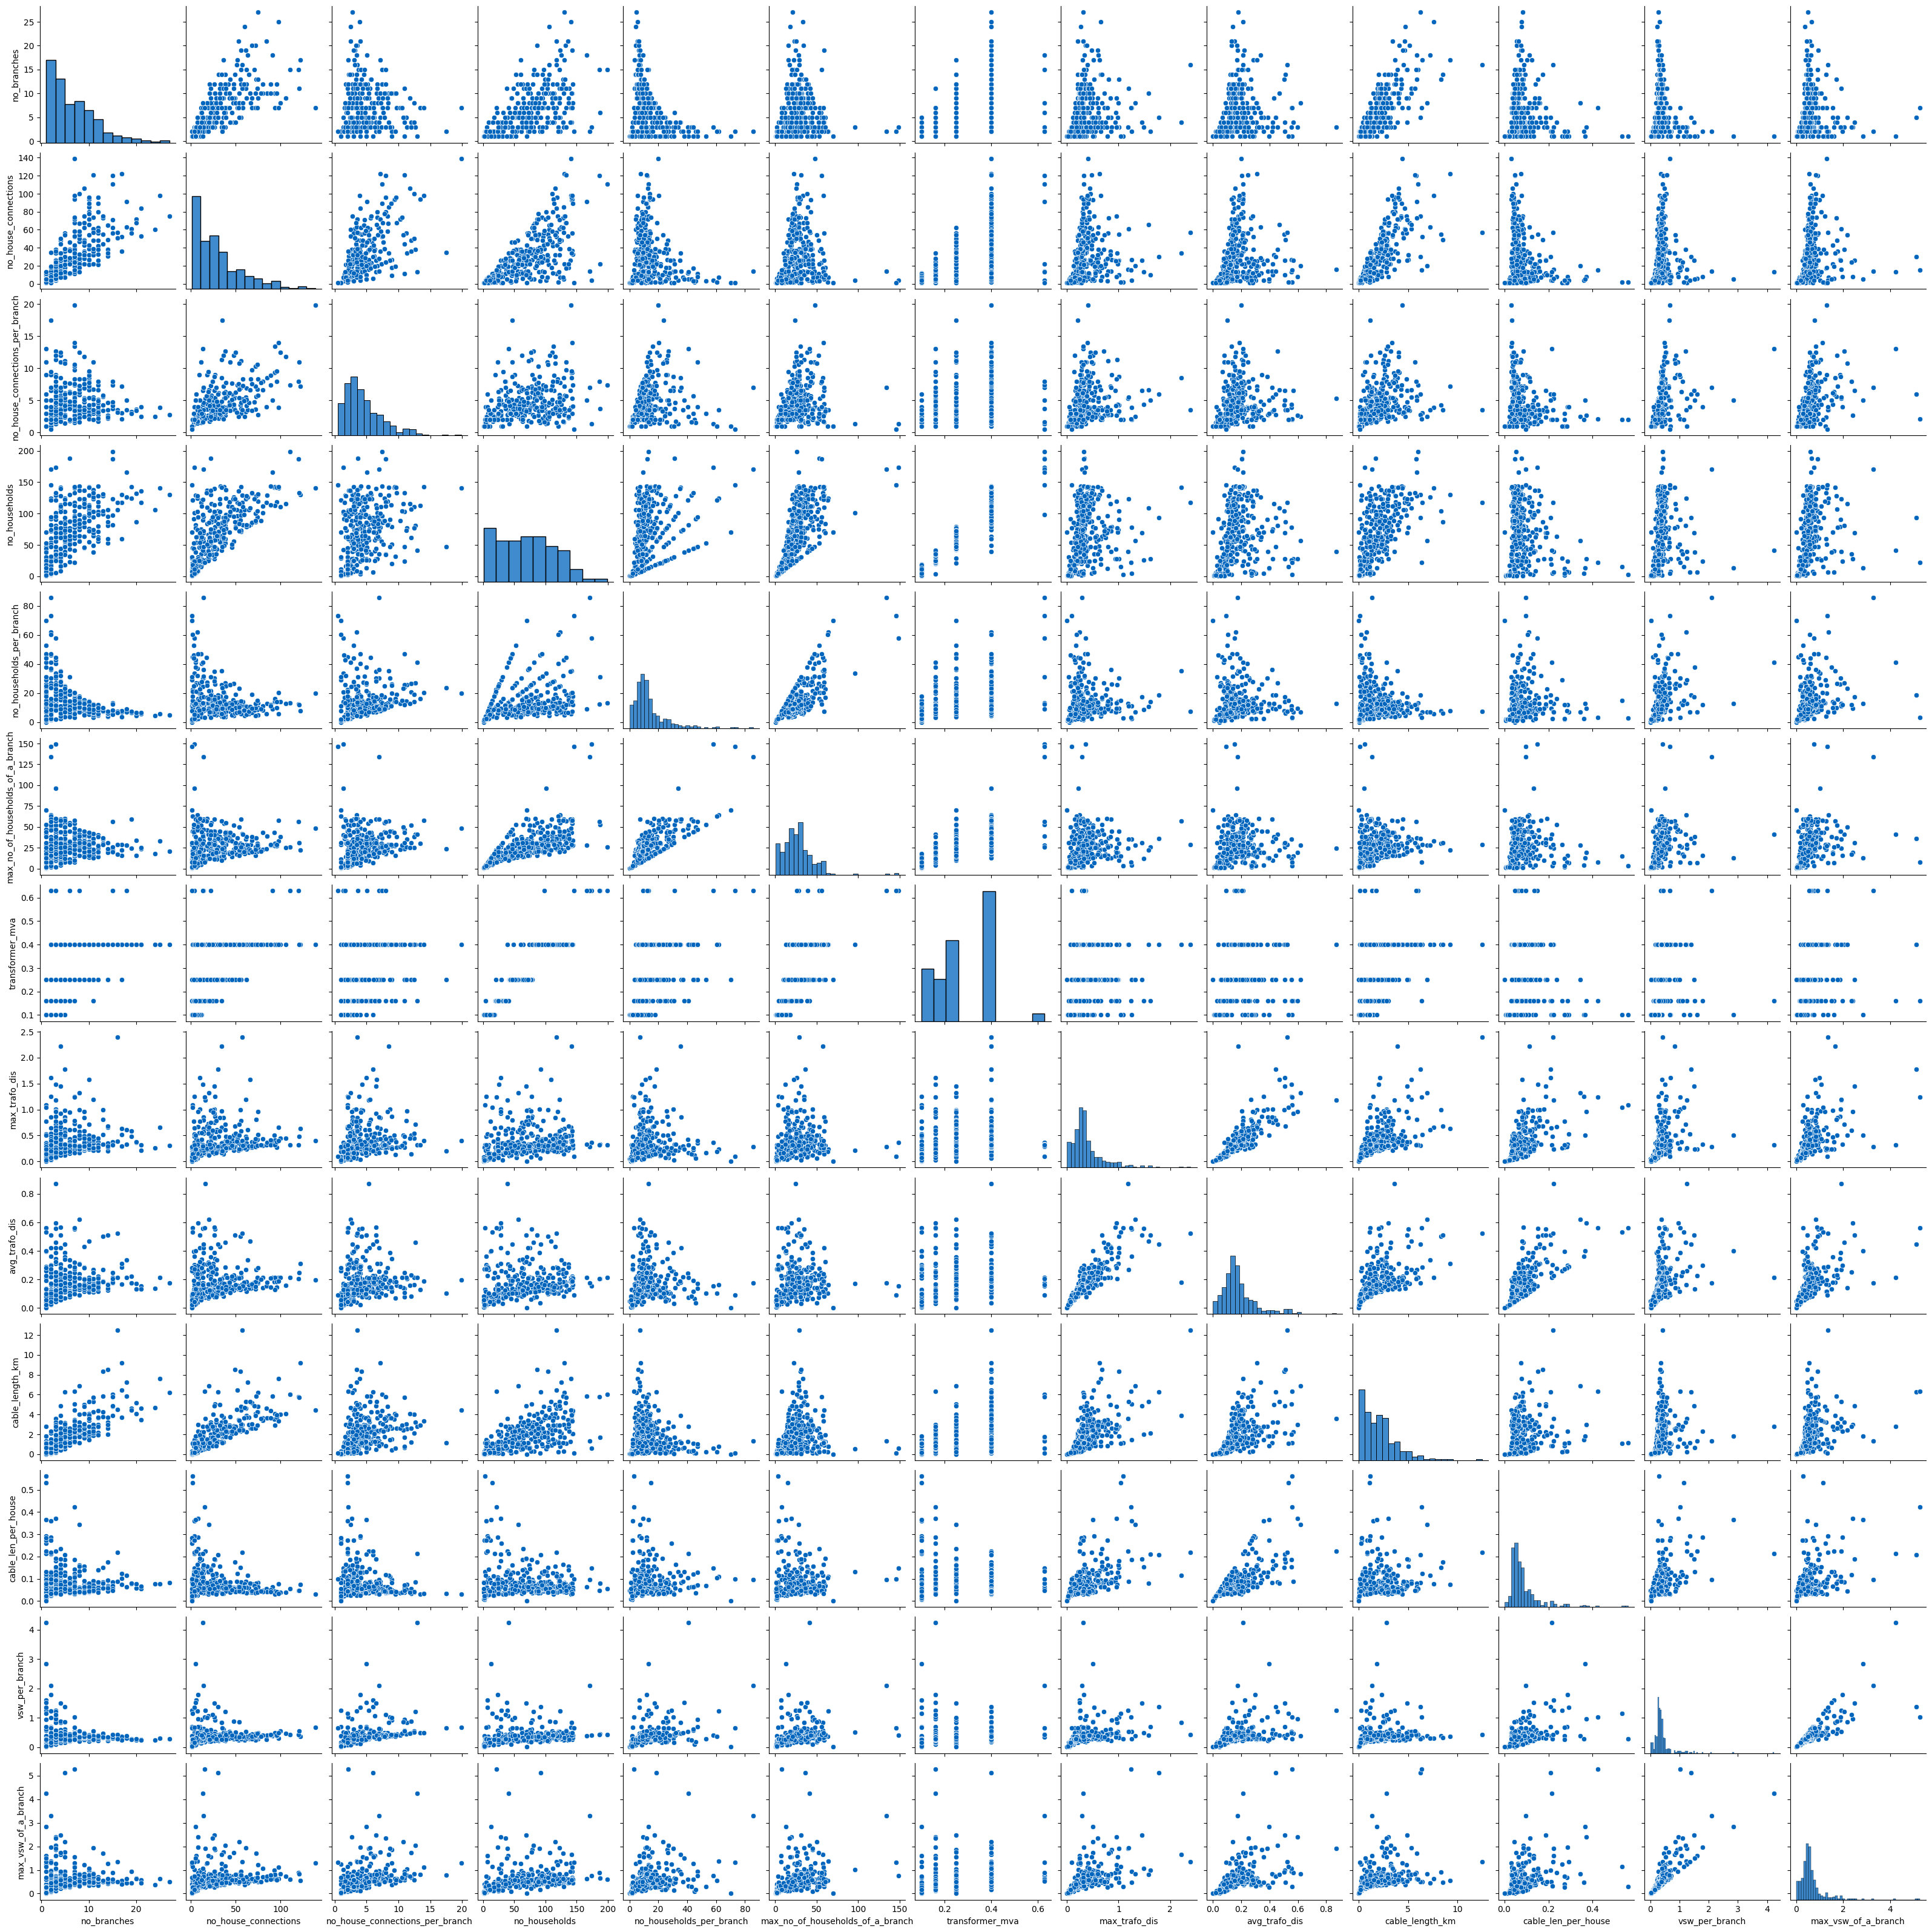

In [3]:
sns.pairplot(df_pairplot)

There is the option to sort the grids by a parameter.

In [4]:
sorted_df = df_parameters_of_grids.sort_values('cable_length_km', ascending=False)
sorted_df.head(10)

version_id    plz  kcid  bcid  no_connection_buses  no_branches  \
154        1.0  83313     2     2                   55           16   
52         1.0  83313     3    18                  121           17   
121        1.0  83313     4     8                   47           14   
47         1.0  83313     4     2                   50           13   
45         1.0  83313     3     7                   91           25   
88         1.0  83313     3    24                   54           18   
46         1.0  83313     3    21                   20            8   
28         1.0  83313     1     7                   50           17   
245        1.0  95189     1    19                   13            7   
171        1.0  85452     1    13                   26            5   

     no_house_connections  no_house_connections_per_branch  no_households  \
154                    57                         3.562500            118   
52                    122                         7.176471            130   
121                    49                         3.500000             87   
47                     55                         4.230769            104   
45                     98                         3.920000            141   
88                     63                         3.500000            126   
46                     20                         2.500000             57   
28                     52                         3.058824            118   
245                    15                         2.142857             22   
171                    30                         6.000000             93   

     no_household_equ  no_households_per_branch  \
154        118.423111                  7.401444   
52         130.000000                  7.647059   
121         86.555611                  6.182544   
47         104.000000                  8.000000   
45         141.000000                  5.640000   
88         125.095966                  6.949776   
46          57.000000                  7.125000   
28         118.000000                  6.941176   
245         22.000000                  3.142857   
171         93.605401                 18.721080   

     max_no_of_households_of_a_branch  house_distance_km  transformer_mva  \
154                              29.0           0.045743             0.40   
52                               22.0           0.031606             0.40   
121                              31.0           0.052805             0.40   
47                               30.0           0.043936             0.40   
45                               33.0           0.029113             0.40   
88                               28.0           0.039344             0.40   
46                               28.0           0.042824             0.25   
28                               29.0           0.039853             0.40   
245                               8.0           0.097456             0.16   
171                              36.0           0.041785             0.40   

     osm_trafo  max_trafo_dis  avg_trafo_dis  cable_length_km  \
154      False       2.394466       0.524848        12.503361   
52       False       0.632477       0.311718         9.215450   
121      False       0.681030       0.510841         8.523067   
47       False       1.000268       0.503326         8.323586   
45       False       0.652789       0.215492         7.596362   
88       False       0.607920       0.336067         7.231490   
46       False       1.322942       0.620956         6.892964   
28       False       0.518028       0.284198         6.434005   
245      False       1.241999       0.560748         6.339542   
171      False       1.781074       0.445218         6.252685   

     cable_len_per_house  max_power_mw  simultaneous_peak_load_mw  resistance  \
154             0.219357      3.552693                   0.393121    6.805369   
52              0.075536      3.900000                   0.367208    6.058685   
121  

In [5]:
plz, kcid, bcid = get_network_info_for_plotting(sorted_df.iloc[0])
plot_grid_on_map(plz=plz, kcid=kcid, bcid=bcid)

Test if geo-data are in lat/long cannot be performed using geopy -> eventual plot errors are possible.
